# Import Libraries

In [2]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,fbeta_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE #for balancing an imbalance data
from xgboost import XGBClassifier
from sklearn.svm import SVC
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import zero_one_loss

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

In [3]:
try:
  HeartDiseaseData = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')
  print(f'Data shape is : {HeartDiseaseData.shape}')
except BaseException as err:
  print("Error :", err)

Data shape is : (253680, 22)


# Reading the data

In [4]:
df = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
df

HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  \
0                        0.0     1.0       1.0        1.0  40.0     1.0   
1                        0.0     0.0       0.0        0.0  25.0     1.0   
2                        0.0     1.0       1.0        1.0  28.0     0.0   
3                        0.0     1.0       0.0        1.0  27.0     0.0   
4                        0.0     1.0       1.0        1.0  24.0     0.0   
...                      ...     ...       ...        ...   ...     ...   
253675                   0.0     1.0       1.0        1.0  45.0     0.0   
253676                   0.0     1.0       1.0        1.0  18.0     0.0   
253677                   0.0     0.0       0.0        1.0  28.0     0.0   
253678                   0.0     1.0       0.0        1.0  23.0     0.0   
253679                   1.0     1.0       1.0        1.0  25.0     0.0   

        Stroke  Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  \
0          0.0       0.0           0.0     0.0  ...            1.0   
1          0.0       0.0           1.0     0.0  ...            0.0   
2          0.0       0.0           0.0     1.0  ...            1.0   
3          0.0       0.0           1.0     1.0  ...            1.0   
4          0.0       0.0           1.0     1.0  ...            1.0   
...        ...       ...           ...     ...  ...            ...   
253675     0.0       0.0           0.0     1.0  ...            1.0   
253676     0.0       2.0           0.0     0.0  ...            1.0   
253677     0.0       0.0           1.0     1.0  ...            1.0   
253678     0.0       0.0           0.0     1.0  ...            1.0   
253679     0.0       2.0           1.0     1.0  ...            1.0   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
0               0.0      5.0      18.0      15.0       1.0  0.0   9.0   
1               1.0      3.0       0.0       0.0       0.0  0.0   7.0   
2               1.0      5.0      30.0      30.0       1.0  0.0   9.0   
3               0.0      2.0       0.0       0.0       0.0  0.0  11.0   
4               0.0      2.0       3.0       0.0       0.0  0.0  11.0   
...             ...      ...       ...       ...       ...  ...   ...   
253675          0.0      3.0       0.0       5.0       0.0  1.0   5.0   
253676          0.0      4.0       0.0       0.0       1.0  0.0  11.0   
253677          0.0      1.0       0.0       0.0       0.0  0.0   2.0   
253678          0.0      3.0       0.0       0.0       0.0  1.0   7.0   
253679          0.0      2.0       0.0       0.0       0.0  0.0   9.0   

        Education  Income  
0             4.0     3.0  
1             6.0     1.0  
2             4.0     8.0  
3             3.0     6.0  
4             5.0     4.0  
...           ...     ...  
253675        6.0     7.0  
253676        2.0     4.0  
253677        5.0     2.0  
253678        5.0     1.0  
253679        6.0     2.0  

[253680 rows x 22 columns]

# Information from the data

In [5]:
df.describe()

HeartDiseaseorAttack         HighBP       HighChol      CholCheck  \
count         253680.000000  253680.000000  253680.000000  253680.000000   
mean               0.094186       0.429001       0.424121       0.962670   
std                0.292087       0.494934       0.494210       0.189571   
min                0.000000       0.000000       0.000000       0.000000   
25%                0.000000       0.000000       0.000000       1.000000   
50%                0.000000       0.000000       0.000000       1.000000   
75%                0.000000       1.000000       1.000000       1.000000   
max                1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke       Diabetes  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean       28.382364       0.443169       0.040571       0.296921   
std         6.608694       0.496761       0.197294       0.698160   
min        12.000000       0.000000       0.000000       0.000000   
25%        24.000000       0.000000       0.000000       0.000000   
50%        27.000000       0.000000       0.000000       0.000000   
75%        31.000000       1.000000       0.000000       0.000000   
max        98.000000       1.000000       1.000000       2.000000   

        PhysActivity         Fruits  ...  AnyHealthcare    NoDocbcCost  \
count  253680.000000  253680.000000  ...  253680.000000  253680.000000   
mean        0.756544       0.634256  ...       0.951053       0.084177   
std         0.429169       0.481639  ...       0.215759       0.277654   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         1.000000       0.000000  ...       1.000000       0.000000   
50%         1.000000       1.000000  ...       1.000000       0.000000   
75%         1.000000       1.000000  ...       1.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

             GenHlth       MentHlth       PhysHlth       DiffWalk  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        2.511392       3.184772       4.242081       0.168224   
std         1.068477       7.412847       8.717951       0.374066   
min         1.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         2.000000       0.000000       0.000000       0.000000   
75%         3.000000       2.000000       3.000000       0.000000   
max         5.000000      30.000000      30.000000       1.000000   

                 Sex            Age      Education         Income  
count  253680.000000  253680.000000  253680.000000  253680.000000  
mean        0.440342       8.032119       5.050434       6.053875  
std         0.496429       3.054220       0.985774       2.071148  
min         0.000000       1.000000       1.000000       1.000000  
25%         0.000000       6.000000       4.000000       5.000000  
50%         0.000000       8.000000       5.000000       7.000000  
75%         1.000000      10.000000       6.000000       8.000000  
max         1.000000      13.000000       6.000000       8.000000  

[8 rows x 22 columns]

In [6]:
def AlcoholDrinking():
  NADP = 0
  NADP_not = 0
  for Disease,Alcohol in zip(df['HeartDiseaseorAttack'],df['CholCheck']):
    if Disease==Alcohol ==1.0:
      NADP +=1
    elif Disease == Alcohol == 0.0:
      NADP_not +=1
  print("Number of Alcohol Drinkers that has Heart Disease", NADP)
  print("Number of Alcohol Drinker that hasn't heart Disease",NADP_not)
AlcoholDrinking()

Number of Alcohol Drinkers that has Heart Disease 23622
Number of Alcohol Drinker that hasn't heart Disease 9199


In [7]:
def smoking():
  smoking = 0
  not_smoking= 0
  for Disease , smoke in zip(df['HeartDiseaseorAttack'], df['Smoker']):
    if Disease == smoke == 1.0:
      smoking +=1
    elif Disease == smoke == 0.0:
      not_smoking +=1
  print("Number of smoking Drinkers that has Heart Disease", smoking)
  print("Number of Alcohol Drinkers that has Heart Disease", not_smoking)
smoking()

Number of smoking Drinkers that has Heart Disease 14801
Number of Alcohol Drinkers that has Heart Disease 132165


In [8]:
male = 0
female = 0
for gender in df['Sex']:
  if gender == 0.0:
    male +=1
  elif gender == 1.0:
    female += 1
print('Number of male in the DataSet', male)
print('Number of female in the DataSet', female)

def gender():
  male=0
  female=0
  for Disease, gender in zip(df['HeartDiseaseorAttack'],df['Sex']):
    if Disease == 1.0 and gender == 0.0:
      male +=1
    elif Disease == 1.0 and gender == 1.0:
      female += 1
  print('Number of male that has heart Disease', male)
  print('Number of female that has heart Disease',female)

gender()

Number of male in the DataSet 141974
Number of female in the DataSet 111706
Number of male that has heart Disease 10205
Number of female that has heart Disease 13688


# Preprocessing
*  how the missing values are handled
*  conversion of textual and categorical data into numerical values (if needed)
*  how the data is splitted into train, validation and test sets
*  the features (=input) and labels (=output), and
*  how the features are normalized or scaled




In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [10]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan,strategy='mean')
imp = imp.fit(df)
dataset=imp.transform(df)

In [12]:
X = df.drop(['HeartDiseaseorAttack'] , axis = 1)
y= np.array(df['HeartDiseaseorAttack'])
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2)

In [13]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train
X_test

array([[-0.86788257,  1.16381928,  0.1975956 , ..., -0.01192879,
        -1.06283351, -0.50688733],
       [ 1.15222961, -0.85923993,  0.1975956 , ..., -2.30318612,
        -1.06283351, -1.47235167],
       [ 1.15222961,  1.16381928,  0.1975956 , ...,  1.62468358,
        -1.06283351, -0.9896195 ],
       ...,
       [-0.86788257,  1.16381928,  0.1975956 , ...,  0.97003863,
         0.96370542,  0.94130918],
       [ 1.15222961,  1.16381928,  0.1975956 , ...,  0.64271616,
        -2.07610297, -0.9896195 ],
       [ 1.15222961,  1.16381928,  0.1975956 , ...,  1.29736111,
         0.96370542, -0.02415516]])

In [14]:
print(df.columns)
print("no. of column = ", len(df.columns))

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')
no. of column =  22


In [15]:
#check data set 
#count no. of HeartDiseaseorAttack to see if it is imbalanced or not

df["HeartDiseaseorAttack"].value_counts() 

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

# Naive Baise

In [14]:
X = df.drop(['HeartDiseaseorAttack'] , axis = 1)

In [15]:
y= np.array(df['HeartDiseaseorAttack'])

In [16]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2)
print(len(X_train))
print(len(X_test))

202944
50736


In [17]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [18]:
# Make predictions on the testing set
y_pred = clf.predict(X_test)
y_pred

array([1., 1., 1., ..., 0., 0., 0.])

In [19]:
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8163828445285399


In [20]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
recall = recall_score(y_test, y_pred)
print('Recall:', recall)
precision = precision_score(y_test, y_pred)
print('Precision:', precision)
f1 = f1_score(y_test,y_pred)
print('F1_score:', f1)

Accuracy: 0.8163828445285399
Recall: 0.5511613308223478
Precision: 0.26863844977052526
F1_score: 0.36121777290181023


In [56]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[44916,  1047],
       [ 4225,   548]])

# Logistic Regression



In [22]:
X = df.drop(['HeartDiseaseorAttack'] , axis = 1)

In [23]:
y= np.array(df['HeartDiseaseorAttack'])

In [24]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2)

In [25]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train
X_test

array([[ 1.15007744, -0.8600633 ,  0.19600171, ...,  1.29718992,
         0.96408625, -0.02518258],
       [-0.86950667,  1.16270512,  0.19600171, ..., -0.33992087,
         0.96408625,  0.94091451],
       [-0.86950667, -0.8600633 ,  0.19600171, ...,  0.96976776,
        -0.04949436, -1.47432822],
       ...,
       [-0.86950667, -0.8600633 ,  0.19600171, ...,  0.6423456 ,
         0.96408625,  0.94091451],
       [ 1.15007744,  1.16270512,  0.19600171, ...,  0.6423456 ,
        -0.04949436,  0.45786597],
       [-0.86950667, -0.8600633 ,  0.19600171, ..., -0.01249872,
        -0.04949436, -0.02518258]])

In [26]:
LogisticRegressionModel = LogisticRegression(penalty= 'l2', solver='sag' ,max_iter=1000, C=1.0, random_state=33)

In [27]:
LogisticRegressionModel.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=33, solver='sag')

In [28]:
print('LogisticRegressionModel Train Score is : ', LogisticRegressionModel.score(X_train,y_train))
print('LogisticRegressionModel Test Score is : ', LogisticRegressionModel.score(X_test,y_test))
print('LogisticRegressionModel Classes  : ', LogisticRegressionModel.classes_)
print('LogisticRegressionModel Number of iteration : ',LogisticRegressionModel.n_iter_)

LogisticRegressionModel Train Score is :  0.9074769394512772
LogisticRegressionModel Test Score is :  0.9088221381267739
LogisticRegressionModel Classes  :  [0. 1.]
LogisticRegressionModel Number of iteration :  [27]


In [29]:
y_pred = LogisticRegressionModel.predict(X_test)
y_pred_prob = LogisticRegressionModel.predict_proba(X_test)
print('Predicted Value for LogisticRegressionModel is : ', y_pred[:10])
print('Predicted Probabilities Value for LogisticRegressionModel is :',y_pred_prob[:10])

Predicted Value for LogisticRegressionModel is :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Predicted Probabilities Value for LogisticRegressionModel is : [[0.75839817 0.24160183]
 [0.97938413 0.02061587]
 [0.96159655 0.03840345]
 [0.84706203 0.15293797]
 [0.99611341 0.00388659]
 [0.96566337 0.03433663]
 [0.96932474 0.03067526]
 [0.99299386 0.00700614]
 [0.97088695 0.02911305]
 [0.6533466  0.3466534 ]]


In [30]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n',CM)

Confusion Matrix is : 
 [[45546   527]
 [ 4099   564]]


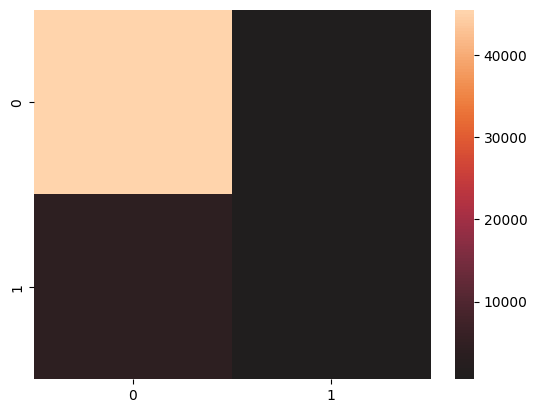

In [31]:
sns.heatmap(CM, center = True)
plt.show()

In [76]:
AccScore = accuracy_score(y_test, y_pred, normalize=False)
print('Accuracy Score is :', AccScore)

F1Score = f1_score(y_test, y_pred, average='micro')
print('F1 Score is : ',F1Score)

RecallScore = recall_score(y_test,y_pred, average='micro')
print('Recall Score is : ',RecallScore)

PrecisionScore = precision_score(y_test, y_pred, average='micro')
print('Precision Score is : ', PrecisionScore)

PrecisionRecallScore = precision_recall_fscore_support(y_test, y_pred, average='micro')
print('Precision Recall Score is : ', PrecisionRecallScore)

PrecisionValue, RecallValue, ThresholdsValue = precision_recall_curve(y_test,y_pred)
print('Precision Value is : ', PrecisionValue)

Accuracy Score is : 45464
F1 Score is :  0.8960895616524757
Recall Score is :  0.8960895616524756
Precision Score is :  0.8960895616524756
Precision Recall Score is :  (0.8960895616524756, 0.8960895616524756, 0.8960895616524757, None)
Precision Value is :  [0.09407521 0.34357367 1.        ]


In [77]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
recall = recall_score(y_test, y_pred)
print('Recall:', recall)
precision = precision_score(y_test, y_pred)
print('Precision:', precision)
f1 = f1_score(y_test,y_pred)
print('F1_score:', f1)

Accuracy: 0.8960895616524756
Recall: 0.11481248690551016
Precision: 0.34357366771159875
F1_score: 0.1721105527638191


In [75]:
print('Recall Value is : ',RecallValue)
print('Thresholds Value is : ',ThresholdsValue)

ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : \n',ClassificationReport)

Recall Value is :  [1.         0.11481249 0.        ]
Thresholds Value is :  [0. 1.]
Classification Report is : 
               precision    recall  f1-score   support

         0.0       0.91      0.98      0.94     45963
         1.0       0.34      0.11      0.17      4773

    accuracy                           0.90     50736
   macro avg       0.63      0.55      0.56     50736
weighted avg       0.86      0.90      0.87     50736



# Decision Tree Algorithm

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
#sklearn.tree.DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_splite=2,min_samples_leaf=1,min_weigh_fraction_leaf=0.0,max_feature=None,reandom_state=None, max_leaf)nodes=None,min_impurity_decrease=0.0,min_impurity_split=None,class_weight=None,presort=false)

In [46]:
X = df.drop(['HeartDiseaseorAttack'] , axis = 1)
y= np.array(df['HeartDiseaseorAttack'])
DecisionTreeRegressionModel = DecisionTreeRegressor(max_depth=3, random_state=33)
DecisionTreeRegressionModel.fit(X_train, y_train)

print('DecisionTreeRegressor Train Score is : ', DecisionTreeRegressionModel.score(X_train, y_train))
print('DecisionTreeRegressor Test Score is : ',DecisionTreeRegressionModel.score(X_test, y_test))

y_pred = DecisionTreeRegressionModel.predict(X_test)
print('Predicted Value for DecisionTreeRegressorModel is : ', y_pred[:10])

DecisionTreeRegressor Train Score is :  0.11927477772812989
DecisionTreeRegressor Test Score is :  0.11185225727644799
Predicted Value for DecisionTreeRegressorModel is :  [0.18757571 0.02575832 0.08755027 0.02575832 0.12630572 0.02575832
 0.02575832 0.02575832 0.02575832 0.12630572]


DecisionTreeClassifier Train Score is :  0.9065850678019552
DecisionTreeClassifier Test Score is :  0.9062795648060549
DecisionTreeClassifier Classes are :  [0. 1.]
DecisionTreeClassifier feature importances are : 
  [0.         0.         0.         0.         0.         0.13196415
 0.         0.         0.         0.         0.         0.
 0.         0.5580496  0.         0.         0.         0.
 0.30998625 0.         0.        ]
Predicted Value for DecisionTreeClassifier is :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Prediction Probabilities Value for DecisionTreeClassifierModel is : 
 [[0.81242429 0.18757571]
 [0.97424168 0.02575832]
 [0.91244973 0.08755027]
 [0.97424168 0.02575832]
 [0.87369428 0.12630572]
 [0.97424168 0.02575832]
 [0.97424168 0.02575832]
 [0.97424168 0.02575832]
 [0.97424168 0.02575832]
 [0.87369428 0.12630572]]
Confusion Matrix is : 
 [[45620   343]
 [ 4412   361]]


<function matplotlib.pyplot.show(close=None, block=None)>

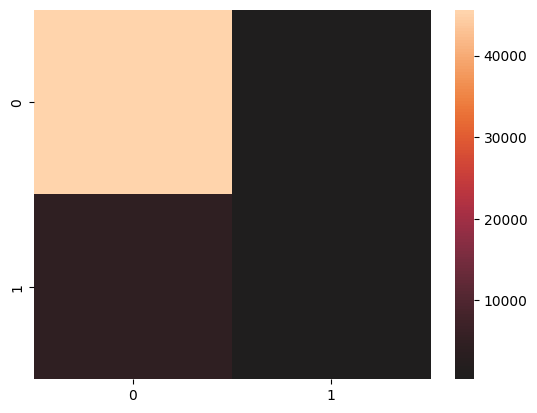

In [48]:
from sklearn.tree import DecisionTreeClassifier
X = df.drop(['HeartDiseaseorAttack'] , axis = 1)
y= np.array(df['HeartDiseaseorAttack'])
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=3, random_state=33)
DecisionTreeClassifierModel.fit(X_train, y_train)

print('DecisionTreeClassifier Train Score is : ', DecisionTreeClassifierModel.score(X_train, y_train))
print('DecisionTreeClassifier Test Score is : ',DecisionTreeClassifierModel.score(X_test, y_test))
print('DecisionTreeClassifier Classes are : ',DecisionTreeClassifierModel.classes_)
print('DecisionTreeClassifier feature importances are : \n ',DecisionTreeClassifierModel.feature_importances_)
y_pred = DecisionTreeClassifierModel.predict(X_test)
y_pred_prob = DecisionTreeClassifierModel.predict_proba(X_test)
print('Predicted Value for DecisionTreeClassifier is : ', y_pred[:10])
print('Prediction Probabilities Value for DecisionTreeClassifierModel is : \n',y_pred_prob[:10])

y_pred = DecisionTreeClassifierModel.predict(X_test)
y_pred_prob = DecisionTreeClassifierModel.predict_proba(X_test)

CM = confusion_matrix(y_test,y_pred)
print('Confusion Matrix is : \n',CM)

sns.heatmap(CM, center=True)
plt.show

In [58]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[44916,  1047],
       [ 4225,   548]])

In [49]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
recall = recall_score(y_test, y_pred)
print('Recall:', recall)
precision = precision_score(y_test, y_pred)
print('Precision:', precision)
f1 = f1_score(y_test,y_pred)
print('F1_score:', f1)

Accuracy: 0.9062795648060549
Recall: 0.07563377330819192
Precision: 0.5127840909090909
F1_score: 0.13182399123607816


In [59]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[44916,  1047],
       [ 4225,   548]])

# K Nearest Neighbors

In [62]:
from sklearn.neighbors import KNeighborsClassifier
#sklearn.neighbors.KNeighborsClassifier(n_neighbors=5,
# weights='uniform'
#, algorithm='auto', 
#leaf_size=30,
#p=2,
#metric='minkowski',
#metric_params=None,
#n_jobs=None)

In [63]:
KNNClassifierModel = KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='auto')
KNNClassifierModel.fit(X_train,y_train)

KNeighborsClassifier()

In [64]:
print('KNNClassifierModel Train Score is : ',KNNClassifierModel.score(X_train,y_train))
print('KNNClassifierModel Test Score is : ',KNNClassifierModel.score(X_test,y_test))

KNNClassifierModel Train Score is :  0.9173515846736046
KNNClassifierModel Test Score is :  0.8960895616524756


In [65]:
#Calculating Prediction
y_pred = KNNClassifierModel.predict(X_test)
y_pred_prob = KNNClassifierModel.predict_proba(X_test)
print('Predicted Value for KNNClassiferModel is : ',y_pred[:10])
print('Predicttion Probabilities Value for KNNClassifierModel is : \n ',y_pred_prob[:10])

Predicted Value for KNNClassiferModel is :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Predicttion Probabilities Value for KNNClassifierModel is : 
  [[1.  0. ]
 [1.  0. ]
 [0.8 0.2]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]]


In [67]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
recall = recall_score(y_test, y_pred)
print('Recall:', recall)
precision = precision_score(y_test, y_pred)
print('Precision:', precision)
f1 = f1_score(y_test,y_pred)
print('F1_score:', f1)

Accuracy: 0.8960895616524756
Recall: 0.11481248690551016
Precision: 0.34357366771159875
F1_score: 0.1721105527638191


In [69]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[44916,  1047],
       [ 4225,   548]])

# Support Vector Machine

In [37]:
X = df.drop(['HeartDiseaseorAttack'] , axis = 1)
y= np.array(df['HeartDiseaseorAttack'])
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2)

In [38]:
# Applying SVR Model
from sklearn.svm import SVR
SVRModel = SVR(C = 1.0,max_iter=100, epsilon=0.1,kernel='rbf')
SVRModel.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVR(max_iter=100)

In [39]:
print('SVRModel Train Score is : ', SVRModel.score(X_train,y_train))
print('SVRModel Test Score is : ', SVRModel.score(X_test,y_test))

SVRModel Train Score is :  -2.4317325005821293
SVRModel Test Score is :  -2.434243354343557


In [40]:
y_pred = SVRModel.predict(X_test)
print('Predicted Value for SVRModel is : ', y_pred[:10])

Predicted Value for SVRModel is :  [0.55593454 0.56408661 0.5595749  0.56044388 0.59720477 0.55186335
 0.55401307 0.54861639 0.56575049 0.38945887]


In [41]:
from sklearn.svm import SVC
SVCModel = SVC(kernel = 'rbf',max_iter=100,C=1.0,gamma='auto')
SVCModel.fit(X_train, y_train)

print('SVCModel Train Score is : ', SVCModel.score(X_train,y_train))
print('SVCModel Test Score is : ', SVCModel.score(X_test, y_test))
y_pred = SVCModel.predict(X_test)
print('Predicted Value for SVCModel is : ',y_pred[:10])

CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

sns.heatmap(CM, center = True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVCModel Train Score is :  0.8942959634184799
SVCModel Test Score is :  0.8948872595395774
Predicted Value for SVCModel is :  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Confusion Matrix is : 
 [[45208   755]
 [ 4578   195]]


In [42]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
recall = recall_score(y_test, y_pred)
print('Recall:', recall)
precision = precision_score(y_test, y_pred)
print('Precision:', precision)
f1 = f1_score(y_test,y_pred)
print('F1_score:', f1)

Accuracy: 0.8948872595395774
Recall: 0.04085480829666876
Precision: 0.20526315789473684
F1_score: 0.06814607723222085


# MLP

In [23]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_iris

X = df.drop(['HeartDiseaseorAttack'] , axis = 1)
y= np.array(df['HeartDiseaseorAttack'])
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100, ),        # Number of hidden layers and units per layer
                    activation='relu',                 # Activation function ('identity', 'logistic', 'tanh', 'relu')
                    solver='adam',                     # Solver for weight optimization ('lbfgs', 'sgd', 'adam')
                    alpha=0.0001,                      # L2 penalty (regularization term) parameter
                    batch_size='auto',                 # Size of minibatches for stochastic optimizers
                    learning_rate='constant',          # Learning rate schedule ('constant', 'invscaling', 'adaptive')
                    learning_rate_init=0.001,          # The initial learning rate
                    power_t=0.5,                       # The exponent for inverse scaling learning rate
                    max_iter=200,                      # Maximum number of iterations
                    shuffle=True,                      # Whether to shuffle samples in each iteration
                    random_state=None,                 # Seed for the random number generator
                    tol=0.0001,                        # Tolerance for the optimization
                    verbose=False,                     # Whether to print progress messages
                    warm_start=False,                  # Reuse the previous solution
                    momentum=0.9,                      # Momentum for gradient descent update
                    nesterovs_momentum=True,           # Whether to use Nesterov's momentum
                    early_stopping=False,              # Terminate training when validation score is not improving
                    validation_fraction=0.1,           # Proportion of training data to set aside as validation set
                    beta_1=0.9,                        # Exponential decay rate for estimates of first moment vector in adam
                    beta_2=0.999,                      # Exponential decay rate for estimates of second moment vector in adam
                    epsilon=1e-8,                      # Value for numerical stability in adam
                    n_iter_no_change=10,               # Maximum number of epochs without any improvement in the loss
                    max_fun=15000)                     # Maximum number of function calls for the solver

# Train the MLP classifier
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[45755   213]
 [ 4447   321]]
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     45968
         1.0       0.60      0.07      0.12      4768

    accuracy                           0.91     50736
   macro avg       0.76      0.53      0.54     50736
weighted avg       0.88      0.91      0.87     50736



In [43]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
recall = recall_score(y_test, y_pred)
print('Recall:', recall)
precision = precision_score(y_test, y_pred)
print('Precision:', precision)
f1 = f1_score(y_test,y_pred)
print('F1_score:', f1)

Accuracy: 0.8948872595395774
Recall: 0.04085480829666876
Precision: 0.20526315789473684
F1_score: 0.06814607723222085
